In [ ]:
# Установить jupyter/ collab и необходимые библиотеки 
!pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 23.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


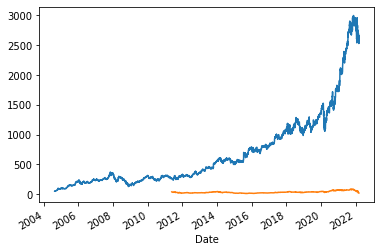

In [ ]:
# Выбрать тикер акции
import yfinance as yf
tickerGoogle = "GOOGL"
tickerYandex = "YNDX"

# Получаем данные по тикерам
googleData = yf.Ticker(tickerGoogle)
yandexData = yf.Ticker(tickerYandex)

# Получаем историю цен 
googleDf = googleData.history(period="max")
yandexDf = yandexData.history(period="max")

googleDf.Close.plot()
yandexDf.Close.plot()

In [ ]:
# Построить линейную регрессию на загруженных данных
# 1) Генерируем лаговые фичи
predicted_window = 10
prediction_columns_Google = ["Close"]
# prediction_columns_Yandex = ["Close"]

for i in range(1, predicted_window + 1):
  col_name = f"shift_{i}"
  prediction_columns_Google.append(col_name)
  # prediction_columns_Yandex.append(col_name)

  googleDf[col_name] = googleDf.Close.shift(i)
  # yandexDf[col_name] = yandexDf.Close.shift(i)

dataGoogle = googleDf[prediction_columns_Google]
# dataYandex = yandexDf[prediction_columns_Yandex]

# Так нужно
dataGoogle = dataGoogle.dropna()
dataGoogle.head()

# dataYandex = dataYandex.dropna()
# dataYandex.head()

,Close,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Date,,,,,,,,,,,
2004-09-02,50.805805,50.175175,51.236237,51.056057,53.128128,54.009010,53.053055,52.487488,54.754753,54.209209,50.220219
2004-09-03,50.055054,50.805805,50.175175,51.236237,51.056057,53.128128,54.009010,53.053055,52.487488,54.754753,54.209209
2004-09-07,50.840839,50.055054,50.805805,50.175175,51.236237,51.056057,53.128128,54.009010,53.053055,52.487488,54.754753
2004-09-08,51.201202,50.840839,50.055054,50.805805,50.175175,51.236237,51.056057,53.128128,54.009010,53.053055,52.487488
2004-09-09,51.206207,51.201202,50.840839,50.055054,50.805805,50.175175,51.236237,51.056057,53.128128,54.009010,53.053055


In [ ]:
# Стандартное разбиение данных
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(googleDf, test_size=0.33, random_state=42, shuffle=False)

In [ ]:
# 2) Строим линейную регрессию
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

googleX = dataGoogle[prediction_columns_Google[:-1]].values
googleY = dataGoogle[prediction_columns_Google[-1]].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(googleX,googleY, test_size=0.33, random_state=42,shuffle=False)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(f"MSE {mean_squared_error(regressor.predict(x_test), y_test)}")

Линейная регрессия 654.6623642029899


In [ ]:
googleData

yfinance.Ticker object <GOOGL>

In [ ]:
# Оценить модель метриками MAE, MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
print(f"MAE {mean_absolute_error(regressor.predict(x_test), y_test)}")
print(f"MAPE {mean_absolute_percentage_error(regressor.predict(x_test), y_test)}")

MAE 16.181792816258266
MAPE 0.011241673291611793


Оценить модель метриками MAE, MAPE
Попробовать различные методы преобразования данных
Попробовать различный размер предиктивного окна

```
# This is formatted as code
```




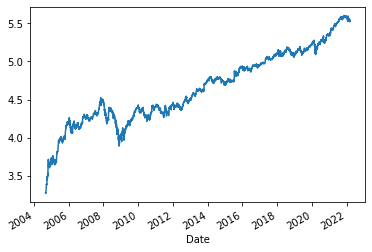

In [ ]:
# Попробовать различные методы преобразования данных
# - Преобразование бокса-кокса
# import pandas as pd
from scipy.stats import boxcox

transformed, lambda_ = boxcox(dataGoogle["Close"].values)
dataGoogle["box_cox"] = transformed
dataGoogle.box_cox.plot() 

In [ ]:
# getDataByTickerAndSlidingWindow ГЕНЕРИТ ДАННЫЕ И и 
def getDataByTickerAndSlidingWindow(ticker, predicted_window):
    # Получаем данные по тикерам
    tikerData = yf.Ticker(ticker)

    # Получаем историю цен 
    tikerDf = tikerData.history(period="max")

   # tikerDf.Close.plot()
  
    # 1) Генерируем лаговые фичи
    # predicted_window = 
    prediction_columns = ["Close"]

    for i in range(1, predicted_window + 1):
        col_name = f"shift_{i}"
        prediction_columns.append(col_name)

        tikerDf[col_name] = tikerDf.Close.shift(i)

    data = tikerDf[prediction_columns]
    # dataYandex = yandexDf[prediction_columns_Yandex]

    # Так нужно
    data = data.dropna()
    data.head()

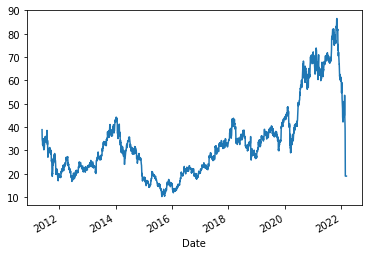

In [ ]:
ynd10 = getDataByTickerAndSlidingWindow("YNDX", 10)


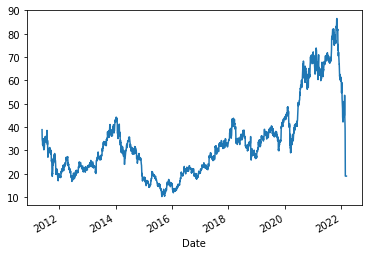

In [ ]:
ynd20 = getDataByTickerAndSlidingWindow("YNDX", 20)

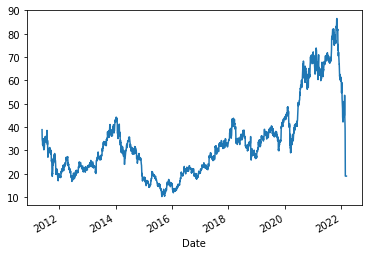

In [ ]:
ynd30 = getDataByTickerAndSlidingWindow("YNDX", 30)